# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**Warning**: This notebook was AI-generated and has not been fully verified. Users should exercise caution when interpreting code and results.

## Overview
This notebook demonstrates how to:
- Connect to DANDI and load Dandiset metadata  
- List available assets  
- Load an NWB file and explore its contents  
- Visualize example data (eye-tracking positions)  
- Summarize high-level structure and suggest future directions

## Required packages
- dandi (dandi-api-client)  
- pynwb  
- remfile  
- h5py  
- numpy  
- matplotlib  

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690", "0.250326.0015")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


## Load NWB file
We select the NWB file `sub-692072_ses-1298465622.nwb` for exploration.

In [2]:
import remfile
import h5py
import pynwb

nwb_url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file, mode='r')
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwb = io.read()

print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: Data and metadata for an Ecephys session
Identifier: 1298465622
Session start time: 2023-09-21 00:00:00-07:00


## High-level structure overview
Use keys and counts to inspect major components.

In [3]:
# Acquisition, processing modules, intervals, electrodes, and units overview
print("Acquisition modules:", list(nwb.acquisition.keys()))
print("Processing modules:", list(nwb.processing.keys()))
print("Intervals (examples):", list(nwb.intervals.keys())[:5], "…")
print("Electrode count:", nwb.electrodes.id.shape[0])
print("Unit count:", len(nwb.units.id))

Acquisition modules: ['EyeTracking', 'raw_running_wheel_rotation', 'running_wheel_signal_voltage', 'running_wheel_supply_voltage']
Processing modules: ['running', 'stimulus']
Intervals (examples): ['Disco2SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'Disk_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'GreenSAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'Ring_Wd15_Vel2_Bndry1_Cntst0_loop_presentations', 'SAC_Wd15_Vel2_Bndry1_Cntst0_loop_presentations'] …
Electrode count: 1536
Unit count: 2764


**Summary of contents**  
- **Acquisition**: EyeTracking (multiple spatial series & blinks), raw wheel signals  
- **Processing**: running (running_speed, etc.), stimulus (timestamps)  
- **Intervals**: several TimeIntervals for stimulus presentations and invalid_times  
- **Electrodes**: 1536 channels in `nwb.electrodes`  
- **Units**: 2764 units in `nwb.units`  
- **Subject metadata** available under `nwb.subject`

You can explore this NWB file interactively on Neurosift:  
https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=draft

## Visualizing eye-tracking data
Plotting the first 1000 eye-tracking positions to illustrate data loading and visualization.

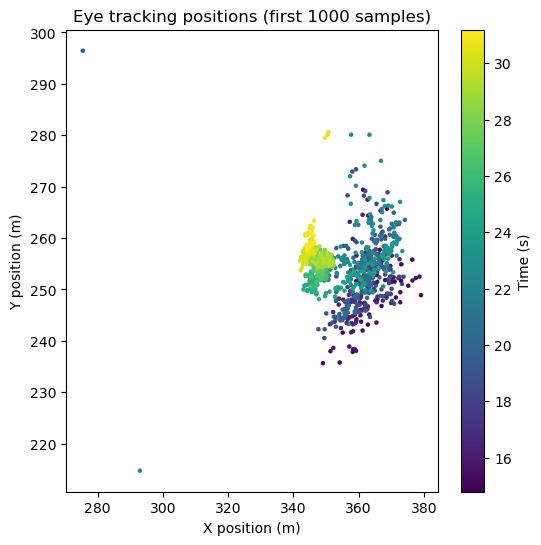

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Access eye-tracking series
eye_tracking = nwb.acquisition["EyeTracking"].spatial_series["eye_tracking"]

# Select subset for plotting
n_samples = min(1000, eye_tracking.data.shape[0])
data = eye_tracking.data[:n_samples, :]
timestamps = eye_tracking.timestamps[:n_samples]

# Create scatter plot
plt.figure(figsize=(6,6))
plt.scatter(data[:, 0], data[:, 1], c=timestamps, cmap='viridis', s=5)
plt.colorbar(label='Time (s)')
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.title(f'Eye tracking positions (first {n_samples} samples)')
plt.show()

**Observation**: The scatter plot shows a dense cluster of gaze positions with a smooth time gradient, indicating continuous eye movement without obvious artifacts.

## Conclusions and future directions
This notebook has guided you through:
- Connecting to DANDI and listing assets  
- Loading and inspecting an NWB file  
- Summarizing its major components  
- Visualizing example eye-tracking data  

**Possible future analyses**:
- Explore running wheel and stimulus intervals in detail  
- Inspect neural unit activity and summary statistics  
- Combine behavioral and neural data to probe sensorimotor relationships  
- Extend to additional NWB files in this Dandiset